# Exponential model

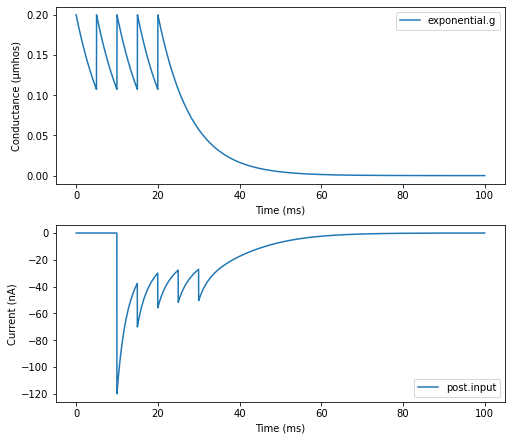

In [4]:
# -*- coding: utf-8 -*-
import matplotlib.pyplot as plt
import brainpy as bp
import brainpy.numpy as np
from bpmodels.neurons import get_LIF
import bpmodels

if __name__ == '__main__':
    duration = 100.
    dt = 0.02
    bp.profile.set(backend="numba", dt=dt, merge_steps=True, show_code=False)
    LIF_neuron = get_LIF()
    exponential_syn = bpmodels.synapses.get_exponential()

    # Set pre & post NeuGroup
    pre = bp.NeuGroup(LIF_neuron, geometry=(10,), monitors=['V', 'input', 'spike'])
    pre.runner.set_schedule(['input', 'update', 'monitor', 'reset'])
    pre.ST['V'] = -65.
    post = bp.NeuGroup(LIF_neuron, geometry=(10,), monitors=['V', 'input', 'spike'])
    post.runner.set_schedule(['input', 'update', 'monitor', 'reset'])
    pre.ST['V'] = -65.

    # Set synapse connection & network
    exponential = bp.SynConn(model=exponential_syn, pre_group=pre, post_group=post,
                             conn=bp.connect.All2All(), monitors=['g'], delay=10.)
    exponential.runner.set_schedule(['input', 'update', 'output', 'monitor'])
    net = bp.Network(pre, exponential, post)

    current = bp.inputs.spike_current([5., 10., 15., 20.], bp.profile._dt, 1., duration=duration)
    net.run(duration=duration, inputs=[exponential, 'pre.spike', current, "="], report=False)

    # Figure
    ts = net.ts
    fig, gs = bp.visualize.get_figure(2, 1, 3, 7)

    fig.add_subplot(gs[0, 0])
    plt.plot(ts, exponential.mon.g[:, 0], label='exponential.g')
    plt.ylabel('Conductance (µmhos)')
    plt.xlabel('Time (ms)')
    plt.legend()

    fig.add_subplot(gs[1, 0])
    plt.plot(ts, post.mon.input[:, 0], label='post.input')
    plt.ylabel('Current (nA)')
    plt.xlabel('Time (ms)')
    plt.legend()

    plt.show()